# Welcome to Jupyter!

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

# Hand-written Digit Recognition


Throught this following notebook we shall be using a package called scikit-learn(sklearn).<br>
This module contains all the requried resources we'll be needing for our digit-recognizer.<br>
The following items are imported from the mod:
   * datasets = contains the data requried for our program(data from images of hand-written digits)
   * svm = learning model 
   * cross_validation.train_test_split = (helper funtion)which we shall use to split out dataset into training and testing samples.
   * matplotlib.pyplot = for plotting out the images 

In [52]:
#!pip3 install sklearn
#!pip3 install matplotlib

In [53]:
#Importing dependencies
from sklearn import datasets,svm
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import sklearn.neural_network as nn

In [54]:

#IMPORT DATA
dataset=datasets.load_digits()


In [55]:
print(dataset.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a


* Let us store our images and labels of what those images are in variables img_data and output_labels respectively.

In [56]:
img_data=dataset.images
output_label=dataset.target

## Lets have a look at some image data

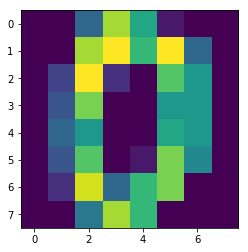

Output Label :  0


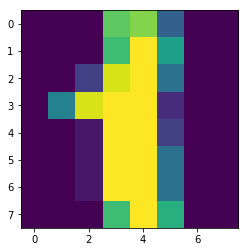

Output Label :  1


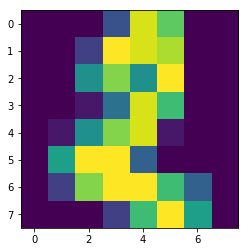

Output Label :  2


In [57]:

#Display few images with labels
for i in range(3):
    plt.imshow(img_data[i])
    plt.show()
    print("Output Label : ",output_label[i])
    

## How do we make the machine understand our data ?

Our training data is in the form of images.But how does the computer interpret it?
The best was for us to represent our data is in the form of vectors.
Here we have 2-D , 8x8 images and we need to reshape each image it into one vector(i.e- of lenght 64)<br>
This step is often reffered to as <b>data-preprocessing</b>.<br>


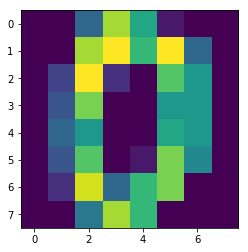

Output Label :  0
The vector i is : 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape of i : (1, 64)


In [58]:

'''
RESHAPE IMAGES(FLATTEN)
We can show how the image is converted to a column vector. 
Original Img-dim = 8x8
Result vector = 1x64 
'''
#Taking one sample image as i 
i=img_data[0]

#Check what the image is 
plt.imshow(img_data[0])
plt.show()
print ("Output Label : ",output_label[0])

#Vectorizing the 2-D image
i=i.reshape((64,1))
#Transposing the column vector to be stored in the dataset
i=i.T 

#Showing i is same as training_data
print ("The vector i is : \n",i[0])
print("Shape of i :",i.shape)


### Lucky for us!

The digits dataset we have ,already has the images converted into a numpy array.We will be using this numerical data now. :)

In [59]:
#And so now we shall use the dataset.data for furthur use. 
training_data=dataset.data


In [60]:
#Lets make sure its the same 
print(training_data[0])
print("Shape : ",training_data.shape)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape :  (1797, 64)


In [61]:
#TRAIN-TEST SPLIT

X_train,X_test,y_train,y_test = train_test_split(training_data,output_label)
print("Total number of samples : ",len(training_data))
print("Number of training samples : ",len(X_train))
print("Number of testing samples : ",len(X_test))

Total number of samples :  1797
Number of training samples :  1347
Number of testing samples :  450


# Defining the learning model
 
### MLP (Multi-Layer Perceptron)

In [74]:

#Defining ous model - Multi Layer Perceptron
model=MLPClassifier(hidden_layer_sizes=(64,128,64,10),verbose=True)
                    #(32,128,256,128,32,10))


### Training
Now we will train our SVM using the training data we had split from the original dataset.(i.e - X_train , y_train )

In [75]:
#Fitting the training data to the model
model.fit(X_train,y_train)

Iteration 1, loss = 2.61155405
Iteration 2, loss = 1.79844934
Iteration 3, loss = 1.49033139
Iteration 4, loss = 1.25387473
Iteration 5, loss = 1.07662620
Iteration 6, loss = 0.93841767
Iteration 7, loss = 0.81920368
Iteration 8, loss = 0.68008650
Iteration 9, loss = 0.54154401
Iteration 10, loss = 0.45690169
Iteration 11, loss = 0.38729756
Iteration 12, loss = 0.32826706
Iteration 13, loss = 0.27581759
Iteration 14, loss = 0.22854166
Iteration 15, loss = 0.19303373
Iteration 16, loss = 0.15567661
Iteration 17, loss = 0.12607195
Iteration 18, loss = 0.10563596
Iteration 19, loss = 0.09001996
Iteration 20, loss = 0.07744777
Iteration 21, loss = 0.06674822
Iteration 22, loss = 0.05782977
Iteration 23, loss = 0.05143641
Iteration 24, loss = 0.04400343
Iteration 25, loss = 0.03999499
Iteration 26, loss = 0.03642126
Iteration 27, loss = 0.03167276
Iteration 28, loss = 0.02879737
Iteration 29, loss = 0.02635282
Iteration 30, loss = 0.02390033
Iteration 31, loss = 0.02229631
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 128, 64, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

### Making prediction

In [76]:
#Making predictions with out model
prediction=model.predict(X_test)

In [77]:
prediction

array([7, 5, 6, 0, 9, 0, 9, 2, 5, 4, 8, 0, 2, 4, 2, 7, 6, 9, 7, 7, 9, 8,
       4, 0, 2, 2, 0, 0, 6, 0, 8, 2, 5, 1, 0, 5, 8, 1, 6, 3, 8, 5, 7, 5,
       1, 9, 3, 9, 0, 9, 9, 7, 8, 7, 8, 3, 4, 4, 1, 4, 5, 7, 7, 9, 0, 0,
       4, 0, 6, 7, 3, 3, 0, 7, 7, 2, 1, 8, 8, 1, 9, 2, 2, 8, 1, 1, 3, 5,
       4, 7, 0, 1, 8, 5, 6, 6, 6, 9, 3, 2, 0, 0, 9, 1, 2, 4, 9, 0, 7, 0,
       8, 1, 4, 6, 9, 0, 8, 4, 0, 9, 2, 8, 1, 0, 3, 4, 5, 4, 0, 8, 2, 2,
       9, 9, 9, 5, 7, 2, 4, 1, 5, 7, 2, 3, 7, 7, 7, 1, 2, 1, 9, 3, 3, 3,
       6, 4, 1, 4, 8, 9, 8, 6, 8, 0, 9, 0, 6, 2, 8, 8, 4, 2, 4, 2, 0, 4,
       6, 9, 6, 9, 6, 0, 8, 8, 5, 1, 5, 1, 6, 5, 1, 5, 6, 9, 7, 7, 5, 1,
       7, 3, 3, 3, 1, 5, 4, 5, 2, 1, 4, 9, 9, 3, 4, 3, 0, 7, 5, 2, 5, 2,
       0, 5, 1, 7, 9, 1, 7, 2, 3, 0, 4, 6, 6, 7, 2, 5, 6, 7, 1, 0, 1, 1,
       6, 7, 9, 7, 8, 8, 6, 2, 0, 7, 9, 6, 2, 4, 3, 4, 3, 6, 1, 3, 4, 4,
       3, 1, 6, 3, 2, 8, 4, 3, 7, 8, 6, 1, 3, 2, 4, 5, 1, 7, 9, 0, 1, 2,
       9, 6, 7, 6, 9, 1, 4, 9, 6, 9, 4, 4, 6, 4, 7,

### Whats all this? How to make sense of it?

All these numbers stored in the prediction array!What are they? <br>
These are the classes of the images in the X_test as <b>predicted by our MLP</b>.


In [78]:
y_test

array([7, 5, 6, 0, 9, 0, 9, 2, 5, 4, 8, 0, 2, 4, 2, 7, 6, 9, 7, 7, 9, 8,
       4, 0, 2, 2, 0, 0, 6, 0, 8, 2, 5, 1, 0, 5, 8, 1, 6, 3, 8, 5, 7, 5,
       1, 9, 3, 9, 0, 9, 9, 7, 8, 7, 8, 3, 4, 4, 1, 4, 5, 7, 7, 9, 0, 0,
       4, 0, 6, 7, 3, 3, 0, 7, 7, 2, 1, 8, 8, 1, 9, 2, 2, 8, 1, 1, 3, 5,
       4, 7, 0, 1, 8, 5, 6, 6, 6, 9, 3, 2, 0, 0, 9, 1, 2, 4, 9, 0, 7, 0,
       8, 1, 4, 6, 9, 0, 8, 4, 0, 9, 2, 8, 1, 0, 3, 4, 5, 4, 0, 8, 2, 2,
       9, 9, 9, 5, 7, 2, 4, 1, 5, 7, 2, 3, 4, 7, 7, 1, 2, 1, 9, 3, 3, 3,
       6, 4, 1, 4, 8, 9, 8, 6, 8, 0, 9, 0, 6, 2, 8, 8, 4, 2, 4, 2, 0, 4,
       6, 9, 6, 9, 6, 0, 8, 8, 5, 1, 5, 1, 6, 5, 1, 5, 6, 9, 7, 7, 5, 1,
       7, 3, 3, 3, 1, 5, 4, 5, 2, 1, 4, 9, 9, 3, 4, 3, 0, 7, 5, 2, 5, 3,
       0, 5, 1, 7, 9, 1, 7, 2, 3, 0, 4, 6, 6, 7, 2, 5, 6, 7, 1, 0, 1, 1,
       6, 7, 9, 7, 8, 8, 6, 2, 0, 7, 9, 6, 1, 4, 3, 4, 3, 6, 6, 3, 4, 4,
       3, 1, 6, 3, 2, 8, 4, 3, 7, 8, 6, 1, 3, 2, 4, 5, 1, 7, 9, 0, 1, 2,
       9, 6, 7, 6, 9, 1, 4, 9, 6, 9, 4, 4, 6, 4, 7,

### Evaluating our model prediction

But how do I actully verify the predictions of the model?<br>
Remeber the y_test array?<br>It contained all the true output labels of the X_test images.<br>
We can compare the prediction and the actual labels(y_test) to see the performace. 

Use the following piece of code to verify your predictions.

In [79]:

#Evaluating model performance
ctr=0
score=0
misclassified=[]
for i,j in zip(y_test,prediction):
    if i==j:
        score+=1
    else:
        misclassified.append((X_test[ctr],y_test[ctr],prediction[ctr]))#Logging misclassified data
        #misclassified.append((X_test[ctr],output_label[ctr],prediction[ctr])) 
        print ("Misclassified at ctr=",ctr,"Predicted to be : ",prediction[ctr],"True Label : ",y_test[ctr])
    ctr+=1

print ("Final Score :",score,"/",len(y_test))
print ("Number of miscalssifications :",len(misclassified))


Misclassified at ctr= 144 Predicted to be :  7 True Label :  4
Misclassified at ctr= 219 Predicted to be :  2 True Label :  3
Misclassified at ctr= 254 Predicted to be :  2 True Label :  1
Misclassified at ctr= 260 Predicted to be :  1 True Label :  6
Misclassified at ctr= 315 Predicted to be :  8 True Label :  5
Misclassified at ctr= 353 Predicted to be :  7 True Label :  9
Misclassified at ctr= 367 Predicted to be :  1 True Label :  8
Misclassified at ctr= 397 Predicted to be :  1 True Label :  8
Misclassified at ctr= 409 Predicted to be :  9 True Label :  3
Misclassified at ctr= 413 Predicted to be :  3 True Label :  2
Misclassified at ctr= 421 Predicted to be :  8 True Label :  3
Misclassified at ctr= 442 Predicted to be :  9 True Label :  3
Misclassified at ctr= 445 Predicted to be :  9 True Label :  7
Misclassified at ctr= 447 Predicted to be :  9 True Label :  5
Final Score : 436 / 450
Number of miscalssifications : 14


### What went wrong?

Lets take a look at where the prediction went wrong 

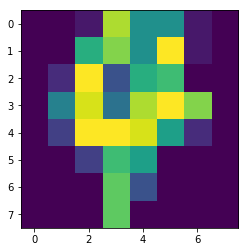

Expected class : 4
Predicted class : 7


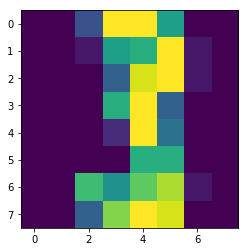

Expected class : 3
Predicted class : 2


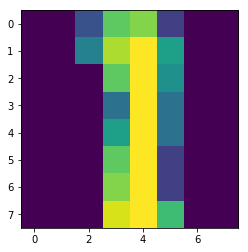

Expected class : 1
Predicted class : 2


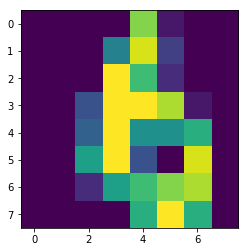

Expected class : 6
Predicted class : 1


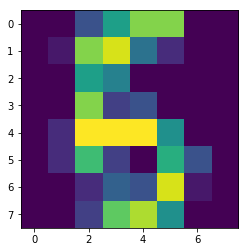

Expected class : 5
Predicted class : 8


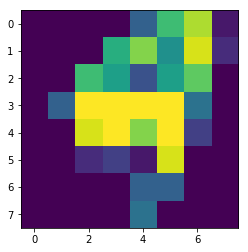

Expected class : 9
Predicted class : 7


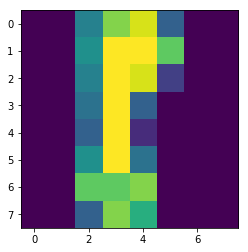

Expected class : 8
Predicted class : 1


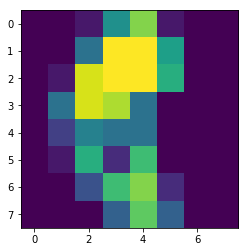

Expected class : 8
Predicted class : 1


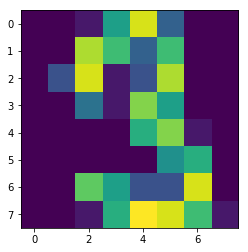

Expected class : 3
Predicted class : 9


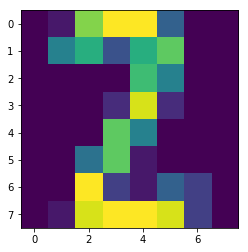

Expected class : 2
Predicted class : 3


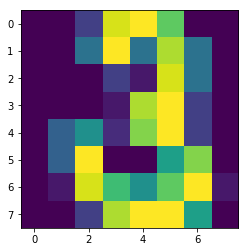

Expected class : 3
Predicted class : 8


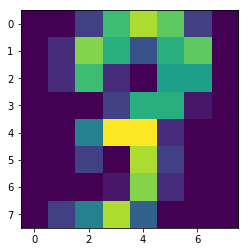

Expected class : 3
Predicted class : 9


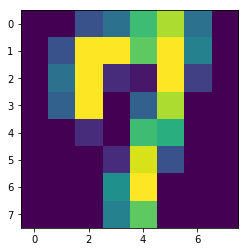

Expected class : 7
Predicted class : 9


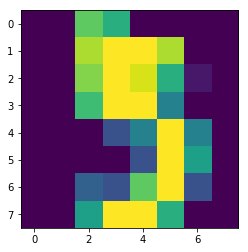

Expected class : 5
Predicted class : 9


In [80]:

#Looking at our misclassification
for data in misclassified:
    plt.imshow(data[0].reshape(8,8))
    plt.show()
    print ("Expected class :",data[1])
    print ("Predicted class :",data[2])

## So is this the best the MLP can perform?

We can expect better results from our network by quite a few ways but lets take a look at what we are'nt doing right->

#### Challenges
* It is usually noticed that Neural Networks perform best when the volume of our data is large.(our dataset is only about 1700 samples, which isn't as big in the ML world).


* As we convert the the 2-D image into a 1-D vector for training purpose our dimensional corelation is lost.This problem was overcome by using a new type of Neural Networks called Convolutional Neural Nets(CNN). 
    (Ref :  __[CNN Paper - Yann LeCun ](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)__ )



### ML != Neural Nets 
There are loads of other algorithms depending on the learning problem one is trying to solve.
But yes,NN have proven to out-perform most other algorithm in cases which involes large datasets(which in today todays world is the most often case).

### What other choice do we have?
   We can look into out ml-module(sci-kit learn) documentation for help!
  __[Model Map](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__
    

### Lets try a SVM?

In [2]:
from sklearn import svm

#Defining ous model - Support Vector Machine
svm_model=svm.SVC(gamma=0.001)


### Training the SVM

In [87]:
#Fitting the training data to the model
svm_model.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

### Making Prediction

In [83]:
#Making predictions with our model
svm_prediction=svm_model.predict(X_test)

In [84]:

#Evaluating model performance
ctr=0
score=0
misclassified=[]
for i,j in zip(y_test,svm_prediction):
    if i==j:
        score+=1
    else:
      misclassified.append((X_test[ctr],y_test[ctr],svm_prediction[ctr])) #Logging misclassified data
      print ("Misclassified at ctr=",ctr)
    ctr+=1

print ("Score :",score,"/",len(y_test))

Misclassified at ctr= 49
Misclassified at ctr= 151
Misclassified at ctr= 315
Misclassified at ctr= 360
Misclassified at ctr= 367
Misclassified at ctr= 397
Misclassified at ctr= 442
Misclassified at ctr= 445
Misclassified at ctr= 447
Score : 441 / 450


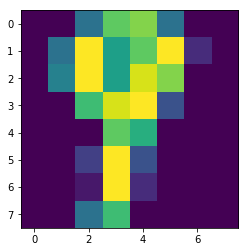

Expected class : 9
Predicted class : 7


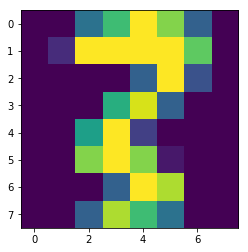

Expected class : 3
Predicted class : 2


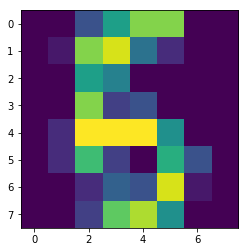

Expected class : 5
Predicted class : 6


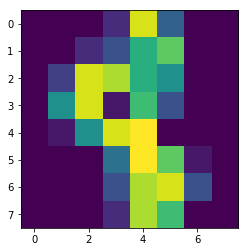

Expected class : 8
Predicted class : 1


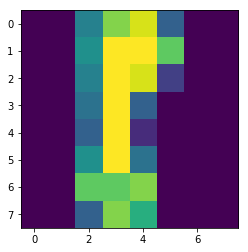

Expected class : 8
Predicted class : 1


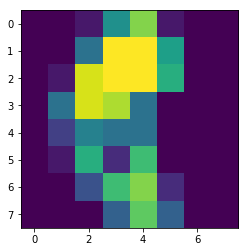

Expected class : 8
Predicted class : 1


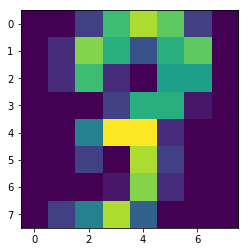

Expected class : 3
Predicted class : 7


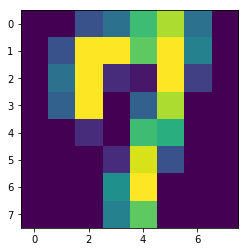

Expected class : 7
Predicted class : 9


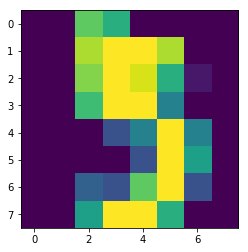

Expected class : 5
Predicted class : 9


In [85]:

#Looking at our misclassification
for data in misclassified:
    plt.imshow(data[0].reshape(8,8))
    
    plt.show()
    print ("Expected class :",data[1])
    print ("Predicted class :",data[2])